# Thesis ABM model

Network model between agents that creates stochastic payment shocks then settles payments. Agents are affliliated to a bank. If with the same bank, settlement occurs in period. If with different bank, payment occurs every fourth period due to "batching".

## Configuring the model

In the Black Rhino framework, parameters are stored in xml files. Using this notebook, you can set change them. First, you need to import the elementree from the xml Python module.

In [1]:
import xml.etree.ElementTree as ET

Below you will find the parameter inputs for this model.  

In [2]:
parameter_values = (('num_sweeps', '101'),
                    ('num_simulations', '1'),
                    ('num_households', '50'),
                    ('num_banks', '5'),
                    ('batch', '4'),
                    ('household_directory', 'agents/gen_households/'),
                    ('bank_directory', 'agents/gen_banks/'),
                    ('measurement_config', 'measurements/test_output.xml')
                   )

To translate this to an xml document, which the framework can read, we first need create an ET element. 

In [3]:
environment = ET.Element('environment', identifier = "CBDC_parameters")

And create parameter elements and give them the values seen below to add to the tree object.

In [4]:
parameters = []
for x in range(len(parameter_values)):
    parameters.append(ET.SubElement(environment, 'parameter'))
    
for idx, p in enumerate(parameters):
    p.set('type', 'static')
    p.set('name', parameter_values[idx][0])
    p.set('value', parameter_values[idx][1])

This object can now be transformed to a string and written to an xml file using the code below. 

In [5]:
xml_params = ET.tostring(environment, encoding="UTF-8")
myfile = open("environments/CBDC_parameters.xml", "w")
myfile.write(xml_params)
myfile.close()

Now, the parameter xml file has been generated and the model can be run. Before, running the model, you need to import a couple of extra modules. These are the Python logging module, the Black Rhino environment class, and the Black Rhino runner class.

In [6]:
import logging
import os
from src.environment import Environment
from src.runner import Runner

Then, before running the model, the logger needs to be initialized.

In [7]:
log_directory = "log/"
identifier = "/CBDC_parameters"
environment_directory = "environments/"
if not os.path.exists('log'):
    os.makedirs('log')
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    filename=log_directory + identifier + ".log", level=logging.INFO)
logging.info('START logging for run: %s',  environment_directory + identifier + ".xml")

Generate banks and households using the generate agents class. The number of households and banks needs to be specified. In the generate banks method, the number of banks is the second argument. In the generate households method, the number of households it the second argument and the number of banks is the thrid argument.

In [8]:
from src.br_generate_agents import Generate_Agents
gen_agents = Generate_Agents()

gen_agents.generate_households(parameter_values[2][1], parameter_values[3][1], "./agents/gen_households/")

gen_agents.generate_banks(parameter_values[3][1], "./agents/gen_banks/")

First, the environment will be initialized. It contains the model parameters and variables. The environment also contains a list of agents. In the Solow model, the environment contains one bank, one firm, and one household. Finally, it also contains initialized transactions for these agents.

In [9]:
environment = Environment(environment_directory, identifier)

Next up, the runner object is created. As the name suggests, the runner object handles the running of the model. But that is not all, it also initializes the updater.

In [10]:
runner = Runner(environment)

Now you can actually run the model. Since the agent-based model is simulated using Monte Carlo methods. This means that the model will be run multiple times (num_simulations). For every simulation run, the environment and runner will be (re-)initialized. Then, the runner will run the Solow model. During the run, the runner will write data about capital to a csv file specified within the Measurement class and print out all the transactions happening and the books of firm and household at the end of each sweep.

In [11]:
for i in range(int(environment.num_simulations)):
    logging.info('  STARTED with run %s',  str(i))
    environment.initialize(environment_directory,  identifier)
    runner.initialize(environment)
    
    runner.do_run(environment)
    logging.info('  DONE')

measurements/test_output.xml
household_19_0s paid 5.0f to bank_0s for household_20_3s at time 0d.
household_41_1s paid 12.0f to bank_1s for household_29_0s at time 0d.
household_22_1s paid 10.0f to bank_1s for household_29_0s at time 0d.
household_20_3s paid 16.0f to bank_3s for household_27_4s at time 0d.
household_8_3s paid 9.0f to bank_3s for household_36_0s at time 0d.
household_40_4s paid 9.0f to bank_4s for household_10_3s at time 0d.
household_9_0s paid 15.0f to bank_0s for household_26_0s at time 0d.
household_44_3s paid 14.0f to bank_3s for household_39_3s at time 0d.
household_42_1s paid 12.0f to bank_1s for household_40_4s at time 0d.
household_18_2s paid 11.0f to bank_2s for household_22_1s at time 0d.
household_21_2s paid 7.0f to bank_2s for household_23_2s at time 0d.
household_25_4s paid 8.0f to bank_4s for household_46_3s at time 0d.
household_34_1s paid 11.0f to bank_1s for household_7_1s at time 0d.
household_3_0s paid 12.0f to bank_0s for household_38_3s at time 0d.


Remove banks and households generated for stimulation from the directories gen_banks and gen_households repectively

In [12]:
import os
remove = True

bank_dir = os.getcwd()+'/agents/gen_banks/'
house_dir = os.getcwd()+'/agents/gen_households/'
if remove:
    bank_list = [ f for f in os.listdir(bank_dir) if f.startswith("bank") ]
    house_list = [ f for f in os.listdir(house_dir) if f.startswith("house") ]
for f in bank_list:
    os.remove(os.path.join(bank_dir, f))
for f in house_list:
    os.remove(os.path.join(house_dir, f))


In [13]:
import pandas as pd
thesis_data = pd.read_csv('measurements/TestMeasurement.csv', index_col=0) 

In [14]:
print(thesis_data.head())
print(thesis_data.tail())

      Balance    B_1    B_2    B_3    B_4    B_5
Step                                            
1      1200.0  224.0  224.0  205.0  227.0  320.0
2      1200.0  248.0  194.0  189.0  241.0  328.0
3      1200.0  262.0  266.0  143.0  203.0  326.0
4      1200.0  308.0  294.0  149.0  180.0  269.0
5      1200.0  261.0  294.0  190.0  181.0  274.0
      Balance    B_1    B_2    B_3    B_4    B_5
Step                                            
97     1200.0  241.0  155.0  248.0  203.0  353.0
98     1200.0  236.0  173.0  217.0  190.0  384.0
99     1200.0  244.0  169.0  184.0  157.0  446.0
100    1200.0  251.0  199.0  132.0  162.0  456.0
101    1200.0  266.0  149.0  117.0  197.0  471.0


In [15]:
import matplotlib.pyplot as plt

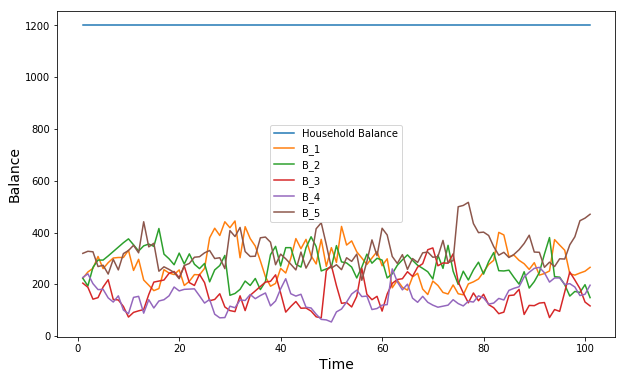

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.plot(thesis_data.index, thesis_data)
ax.set_xlabel('Time', fontsize='14')
ax.set_ylabel('Balance', fontsize='14')
ax.legend(['Household Balance', 'B_1',  'B_2', 'B_3', 'B_4', 'B_5',  'Bank_Balance', 'H_2_3', 'H_2_4', 'Bank_Balance'])

fig.savefig('solow_capital.png')

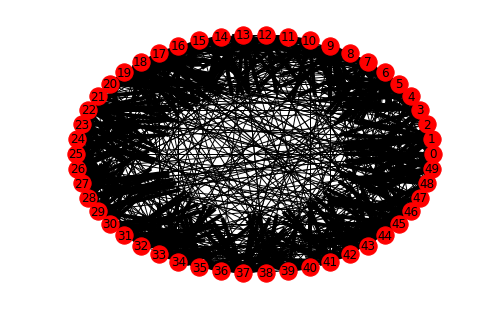

In [18]:
import networkx as nx
nx.draw_shell(environment.network)